This project includes code from:
https://www.kaggle.com/code/nujhatraisaarpa/taco-trash-detection-yolo12n
Licensed under the Apache 2.0 License.

# Install torch

In [1]:
# Install dependencies
!pip install torch torchvision numpy opencv-python tqdm matplotlib 


In [2]:
!pip install -q albumentations pycocotools ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.9 MB/s eta 0:00:00


# Libraries

In [4]:
import os
import yaml
from ultralytics import YOLO
import zipfile
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
import yaml

with open('/kaggle/input/taco-dataset-yolo-format/data.yaml', 'r') as f:
    data_info = yaml.safe_load(f)

print(f"Number of Classes: {data_info['nc']}")
print("Classes:", data_info['names'])


Number of Classes: 18
Classes: ['Aluminium foil', 'Bottle cap', 'Bottle', 'Broken glass', 'Can', 'Carton', 'Cigarette', 'Cup', 'Lid', 'Other litter', 'Other plastic', 'Paper', 'Plastic bag - wrapper', 'Plastic container', 'Pop tab', 'Straw', 'Styrofoam piece', 'Unlabeled litter']


# Training Parameters

In [7]:
# Define training parameters
epochs = 100
batch_size = 16
imgsz = 640  # Image size
optimizer_type = 'AdamW'  # AdamW optimizer (recommended for better regularization)
lr = 1e-4
weight_decay = 1e-4

# Model Training

In [8]:
# Initialize YOLOv8 model (pre-trained weights)
model = YOLO("yolo12n.pt")

# Train model with Cosine Annealing learning rate scheduler
model.train(
    data="/kaggle/input/taco-dataset-yolo-format/data.yaml",
    epochs=epochs,
    batch=batch_size,
    imgsz=imgsz,
    optimizer=optimizer_type,
    lr0=lr,  # Initial learning rate
    weight_decay=weight_decay,
    save=True,  # Save the best model
    save_period=1,  # Save model every 10 epochs
    val=True,  # Evaluate on validation set
    save_dir='runs/train/exp'  # Save directory for model and logs
)

100%|██████████| 5.34M/5.34M [00:00<00:00, 152MB/s]


Ultralytics 8.3.121 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo12n.pt, data=/kaggle/input/taco-dataset-yolo-format/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 48.2MB/s]


Overriding model.yaml nc=80 with nc=18

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  2    180864  ultralytics.nn.modules.block.A2C2f           [128, 128, 2, True, 4]        
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 183MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 15.7±6.7 MB/s, size: 51.7 KB)


train: Scanning /kaggle/input/taco-dataset-yolo-format/train/labels... 4200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4200/4200 [00:12<00:00, 345.44it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/taco-dataset-yolo-format/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 12.8±6.5 MB/s, size: 35.4 KB)


val: Scanning /kaggle/input/taco-dataset-yolo-format/valid/labels... 1704 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1704/1704 [00:04<00:00, 346.19it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/taco-dataset-yolo-format/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.0001, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0001), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.45G      1.479      3.792       1.32         49        640: 100%|██████████| 263/263 [01:24<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:13<00:00,  4.15it/s]


                   all       1704       4830      0.159      0.124     0.0312     0.0204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.32G      1.376      3.183      1.272         37        640: 100%|██████████| 263/263 [01:20<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.61it/s]


                   all       1704       4830      0.147      0.177     0.0644     0.0447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.32G      1.338      2.892      1.238         23        640: 100%|██████████| 263/263 [01:18<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.69it/s]


                   all       1704       4830      0.297      0.174     0.0979     0.0712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.32G      1.284      2.716      1.207         35        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.64it/s]


                   all       1704       4830      0.313      0.188      0.118      0.085

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.32G      1.273      2.572        1.2         28        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.58it/s]


                   all       1704       4830      0.217      0.199      0.133     0.0979

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.32G      1.247      2.468      1.187         29        640: 100%|██████████| 263/263 [01:18<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.61it/s]


                   all       1704       4830      0.336      0.203      0.162      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.32G      1.246      2.383      1.175         15        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.53it/s]


                   all       1704       4830      0.317      0.212      0.169      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.32G      1.238       2.31      1.169         83        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.65it/s]


                   all       1704       4830       0.36      0.212       0.18      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.32G      1.197      2.189      1.157         21        640: 100%|██████████| 263/263 [01:18<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.68it/s]


                   all       1704       4830      0.375      0.226      0.186      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.32G      1.204      2.127      1.149         36        640: 100%|██████████| 263/263 [01:18<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.68it/s]


                   all       1704       4830      0.318      0.226      0.189       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.32G      1.177      2.065      1.142         27        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.65it/s]


                   all       1704       4830      0.346       0.23      0.195      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.32G      1.181      2.004      1.135         25        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.54it/s]


                   all       1704       4830      0.381      0.238      0.206      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.32G      1.147      1.908      1.122         25        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.60it/s]


                   all       1704       4830      0.441      0.237       0.23      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.32G      1.163      1.899      1.123         24        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.75it/s]


                   all       1704       4830      0.367      0.262      0.233      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.32G      1.151      1.836      1.118         24        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.72it/s]


                   all       1704       4830       0.39      0.244      0.234      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.32G      1.158      1.782      1.112         99        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.72it/s]


                   all       1704       4830      0.368      0.271      0.237      0.178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.32G      1.136      1.724      1.104         31        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.68it/s]


                   all       1704       4830      0.411      0.266      0.243       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.32G      1.116      1.687      1.092         21        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.58it/s]


                   all       1704       4830      0.376      0.269      0.247      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.32G      1.122      1.655      1.097         24        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.67it/s]


                   all       1704       4830      0.393      0.285      0.256      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.32G      1.091      1.584      1.078         29        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.72it/s]


                   all       1704       4830      0.404      0.274      0.253      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.32G       1.11      1.581      1.095         28        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.75it/s]


                   all       1704       4830      0.451      0.265      0.267      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.32G      1.107      1.545      1.093         31        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.74it/s]


                   all       1704       4830      0.431      0.285      0.273      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.32G      1.098      1.512      1.079         26        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.76it/s]


                   all       1704       4830      0.423      0.304      0.275      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.32G      1.076      1.452      1.075         19        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.71it/s]


                   all       1704       4830      0.456      0.291      0.279      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.32G      1.074      1.427      1.077         20        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.65it/s]


                   all       1704       4830      0.486      0.277      0.285       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.32G      1.064      1.413      1.069         26        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.77it/s]


                   all       1704       4830      0.425      0.293      0.275      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.32G      1.064      1.368      1.072         33        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.74it/s]


                   all       1704       4830      0.484      0.289      0.291      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.32G      1.071       1.37       1.07         43        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.79it/s]


                   all       1704       4830      0.438      0.305      0.292      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.32G       1.06      1.331      1.066         15        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.64it/s]

                   all       1704       4830      0.469      0.296      0.296      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.32G      1.042      1.298      1.056         31        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.67it/s]


                   all       1704       4830      0.428      0.318      0.298      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.32G      1.036      1.275      1.057         49        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.80it/s]


                   all       1704       4830      0.467      0.292      0.301       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.32G      1.048      1.251      1.053         42        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.81it/s]


                   all       1704       4830      0.466      0.299      0.301      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.32G      1.023       1.21      1.049         37        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.83it/s]


                   all       1704       4830      0.455      0.324      0.312      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.32G      1.035       1.23       1.05         65        640: 100%|██████████| 263/263 [01:18<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.66it/s]


                   all       1704       4830      0.552        0.3      0.315       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.32G      1.031      1.216      1.051         26        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.61it/s]


                   all       1704       4830      0.501      0.302      0.314      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.32G      1.015      1.174      1.041         27        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.82it/s]


                   all       1704       4830      0.483      0.309      0.315      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.32G      1.021      1.155      1.044         32        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.84it/s]


                   all       1704       4830       0.46      0.318      0.314      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.32G          1      1.126      1.037         18        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.76it/s]


                   all       1704       4830      0.531      0.313      0.322      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.32G      1.024      1.135      1.038         44        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.80it/s]


                   all       1704       4830      0.473      0.317      0.322      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.32G      1.003      1.121      1.036         25        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.73it/s]


                   all       1704       4830      0.466      0.324      0.323      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.32G      1.005      1.096       1.04         41        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.70it/s]


                   all       1704       4830      0.519        0.3      0.326       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.32G     0.9939      1.061      1.031         30        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.82it/s]


                   all       1704       4830      0.513      0.318      0.328      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.32G     0.9894      1.066      1.032         23        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.79it/s]


                   all       1704       4830      0.485      0.335      0.333      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.32G     0.9873      1.052      1.024         28        640: 100%|██████████| 263/263 [01:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.88it/s]

                   all       1704       4830      0.544      0.333      0.342      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.32G     0.9839      1.047      1.025         30        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.80it/s]


                   all       1704       4830      0.541      0.328      0.343      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.32G     0.9799      1.029      1.026         32        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.76it/s]


                   all       1704       4830      0.529      0.326      0.337      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.32G     0.9818      1.024      1.023         38        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.90it/s]


                   all       1704       4830      0.519      0.332      0.344      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.32G     0.9777      1.006      1.022         22        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.86it/s]

                   all       1704       4830      0.509      0.336      0.345      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.32G     0.9689     0.9884      1.018         35        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.90it/s]

                   all       1704       4830      0.589      0.325       0.35      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.32G     0.9802     0.9969      1.024         44        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.91it/s]

                   all       1704       4830      0.521      0.345      0.347      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.32G     0.9704     0.9972      1.023         57        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.79it/s]

                   all       1704       4830      0.546      0.326       0.34       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.32G     0.9552     0.9591      1.014         36        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.82it/s]


                   all       1704       4830      0.546      0.332      0.344      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.32G     0.9747     0.9626      1.014         11        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.91it/s]

                   all       1704       4830       0.58      0.335      0.354      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.32G     0.9609     0.9546      1.014         22        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.89it/s]

                   all       1704       4830      0.532      0.343      0.354      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.32G     0.9557     0.9329      1.012         45        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.89it/s]

                   all       1704       4830       0.52       0.35      0.353      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.32G     0.9529      0.933      1.011         68        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.83it/s]


                   all       1704       4830      0.548      0.338      0.349      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.32G     0.9505     0.9216      1.011         28        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.75it/s]

                   all       1704       4830      0.546       0.34      0.354      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.32G     0.9413     0.9073      1.008         90        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.88it/s]

                   all       1704       4830      0.608       0.33      0.352      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.32G     0.9429     0.9001      1.009         29        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.89it/s]


                   all       1704       4830      0.545      0.344      0.357      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.32G     0.9404     0.9065      1.007         14        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.89it/s]

                   all       1704       4830      0.574      0.345      0.363      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.32G     0.9277     0.8924      1.006         25        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.76it/s]

                   all       1704       4830        0.6      0.336      0.362      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.32G     0.9412     0.8997      1.004         29        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.87it/s]

                   all       1704       4830      0.596      0.347      0.366      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.32G      0.924     0.8776      1.002         36        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.94it/s]

                   all       1704       4830      0.557       0.36      0.369       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.32G     0.9223     0.8677      1.003         32        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.93it/s]

                   all       1704       4830      0.611       0.35      0.367       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.32G     0.9269     0.8663      1.002         30        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.89it/s]


                   all       1704       4830      0.591      0.351      0.369      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.32G     0.9323     0.8745     0.9984         23        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.84it/s]


                   all       1704       4830       0.62      0.335      0.365      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.32G     0.9292     0.8731      1.002         22        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.80it/s]

                   all       1704       4830      0.567      0.356      0.366       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.32G     0.9187     0.8487     0.9966         30        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.84it/s]


                   all       1704       4830      0.583      0.351      0.365      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.32G     0.9174     0.8406     0.9885         28        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.90it/s]

                   all       1704       4830      0.604      0.343      0.366      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.32G     0.9131     0.8439     0.9885         19        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.87it/s]

                   all       1704       4830      0.621      0.352      0.373      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.32G     0.9058     0.8285      0.993         48        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.83it/s]


                   all       1704       4830      0.636      0.339      0.369      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.32G     0.9126     0.8332     0.9909         30        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.81it/s]

                   all       1704       4830      0.628      0.339      0.369      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.32G     0.8979     0.8267     0.9883         40        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.89it/s]

                   all       1704       4830      0.614      0.344      0.371      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.32G     0.9013     0.8202     0.9913         33        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.89it/s]


                   all       1704       4830      0.609      0.342      0.369      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.32G     0.8943      0.809     0.9837         21        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.96it/s]

                   all       1704       4830      0.633      0.344      0.369      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.32G     0.8871     0.8103     0.9822         30        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.81it/s]

                   all       1704       4830      0.638       0.35      0.374      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.32G     0.8849     0.8051     0.9854         26        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.81it/s]

                   all       1704       4830      0.673      0.339      0.376      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.32G     0.8888     0.8027     0.9833         26        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.87it/s]

                   all       1704       4830      0.626      0.346      0.376      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.32G     0.8865     0.7889     0.9847         32        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.92it/s]


                   all       1704       4830      0.629      0.345      0.375      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.32G     0.8985     0.7969      0.987         22        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.93it/s]

                   all       1704       4830      0.668      0.338      0.377      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.32G     0.8987     0.8017      0.985         19        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.83it/s]

                   all       1704       4830      0.663      0.345      0.377      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.32G     0.8774     0.7876     0.9806         36        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.83it/s]

                   all       1704       4830      0.647       0.35       0.38      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.32G     0.8788     0.7719     0.9748         43        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.94it/s]

                   all       1704       4830      0.612      0.357      0.381      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.32G     0.8698     0.7704     0.9793         39        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.96it/s]

                   all       1704       4830      0.625      0.349      0.379       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.32G     0.8831      0.776     0.9758         34        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.97it/s]


                   all       1704       4830      0.614      0.351      0.379      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.32G     0.8749     0.7726     0.9809         21        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.82it/s]


                   all       1704       4830      0.592      0.362      0.379       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.32G     0.8897     0.7795     0.9792         44        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.83it/s]

                   all       1704       4830      0.607      0.357      0.381      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.32G      0.878     0.7619     0.9747         31        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.94it/s]

                   all       1704       4830      0.615      0.354       0.38      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.32G     0.8725     0.7559     0.9692         23        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.86it/s]

                   all       1704       4830       0.62      0.349       0.38      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.32G     0.8736     0.7563     0.9765         20        640: 100%|██████████| 263/263 [01:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.93it/s]

                   all       1704       4830      0.658      0.342      0.384      0.296


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.32G     0.8177     0.6769     0.9282         17        640: 100%|██████████| 263/263 [01:18<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.87it/s]


                   all       1704       4830      0.578       0.36      0.377      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.32G     0.8072      0.649     0.9229         12        640: 100%|██████████| 263/263 [01:18<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.72it/s]

                   all       1704       4830      0.569      0.363      0.379      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.32G     0.7992     0.6366       0.92         41        640: 100%|██████████| 263/263 [01:18<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.92it/s]

                   all       1704       4830      0.608      0.355      0.379       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.32G     0.8027     0.6392     0.9158         13        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.86it/s]

                   all       1704       4830      0.614      0.354      0.381      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.32G     0.8004     0.6278      0.917         13        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.90it/s]

                   all       1704       4830      0.602      0.354       0.38      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.32G     0.8051       0.63     0.9185         33        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.85it/s]

                   all       1704       4830      0.596      0.359      0.381      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.32G     0.7981     0.6259     0.9162         15        640: 100%|██████████| 263/263 [01:18<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.81it/s]


                   all       1704       4830      0.617      0.352      0.383      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.32G     0.7941     0.6177     0.9149         17        640: 100%|██████████| 263/263 [01:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.92it/s]


                   all       1704       4830      0.592       0.36      0.383      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.32G     0.7866     0.6117     0.9102         18        640: 100%|██████████| 263/263 [01:18<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.83it/s]


                   all       1704       4830      0.609      0.358      0.385      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.32G     0.7958     0.6169     0.9175         34        640: 100%|██████████| 263/263 [01:18<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.94it/s]


                   all       1704       4830      0.602       0.36      0.385      0.295

100 epochs completed in 2.512 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.121 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv12n summary (fused): 159 layers, 2,560,238 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:12<00:00,  4.24it/s]


                   all       1704       4830      0.656      0.342      0.383      0.296
        Aluminium foil         48         62      0.881        0.5      0.509      0.417
            Bottle cap        347        459      0.716      0.638      0.682       0.54
                Bottle        275        320      0.736      0.392      0.494      0.314
          Broken glass         13        123      0.516     0.0407     0.0536      0.029
                   Can        187        267      0.652      0.604      0.671      0.538
                Carton        207        263      0.584      0.518       0.52      0.442
             Cigarette        223        565      0.769     0.0796       0.16     0.0801
                   Cup        162        186      0.651      0.543      0.585      0.476
                   Lid         82         93      0.724      0.312       0.38      0.313
          Other litter        148        178      0.668      0.236      0.293       0.24
         Other plasti

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a3b5c6724d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    

In [ ]:
import os

save_dir = '/kaggle/working/runs/train2/exp'

# List files and directories in save_dir
if os.path.exists(save_dir):
    print(os.listdir(save_dir))
else:
    print(f"The directory '{save_dir}' does not exist.")


In [ ]:
!zip -r best_model.zip runs/detect/train2/weights/best.pt

In [11]:
best_model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")
val_results = best_model.val()

print(f"Best Validation Metrics from Best Model:")
print(f"Precision: {val_results.box.mp:.4f}")
print(f"Recall: {val_results.box.mr:.4f}")
print(f"mAP@50: {val_results.box.map50:.4f}")
print(f"mAP@50-95: {val_results.box.map:.4f}")



Ultralytics 8.3.121 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv12n summary (fused): 159 layers, 2,560,238 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 59.8±32.1 MB/s, size: 28.8 KB)


val: Scanning /kaggle/input/taco-dataset-yolo-format/valid/labels... 1704 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1704/1704 [00:02<00:00, 765.36it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/taco-dataset-yolo-format/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:14<00:00,  7.47it/s]


                   all       1704       4830      0.656      0.343      0.384      0.296
        Aluminium foil         48         62       0.88        0.5      0.509      0.417
            Bottle cap        347        459       0.72      0.641      0.682      0.539
                Bottle        275        320      0.732      0.392      0.493      0.316
          Broken glass         13        123      0.507     0.0407     0.0571     0.0269
                   Can        187        267      0.652      0.603       0.67      0.537
                Carton        207        263      0.584      0.518       0.52      0.443
             Cigarette        223        565      0.762     0.0779      0.159     0.0819
                   Cup        162        186      0.644      0.543      0.585      0.476
                   Lid         82         93      0.707      0.312      0.381      0.313
          Other litter        148        178      0.668      0.236      0.293       0.24
         Other plasti

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.3ms preprocess, 3.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val3
Best Validation Metrics from Best Model:
Precision: 0.6556
Recall: 0.3425
mAP@50: 0.3840
mAP@50-95: 0.2963


# log file testing

In [13]:
import pandas as pd

# Read the log file into a DataFrame
log_file = '/kaggle/working/runs/detect/train/results.csv'
log_data = pd.read_csv(log_file)

# Check the first few rows of the data and column names
print(log_data.columns)
print(log_data.head())


Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   97.9956         1.47949         3.79202         1.32025   
1      2  190.6770         1.37557         3.18282         1.27228   
2      3  281.8080         1.33809         2.89200         1.23800   
3      4  372.7440         1.28358         2.71636         1.20726   
4      5  464.0510         1.27335         2.57193         1.19973   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.15874            0.12393           0.03118   
1               0.14728            0.17709           0.06440   
2               0.29661            0.17351           0.09786   
3               0.31307            

# Graphs 

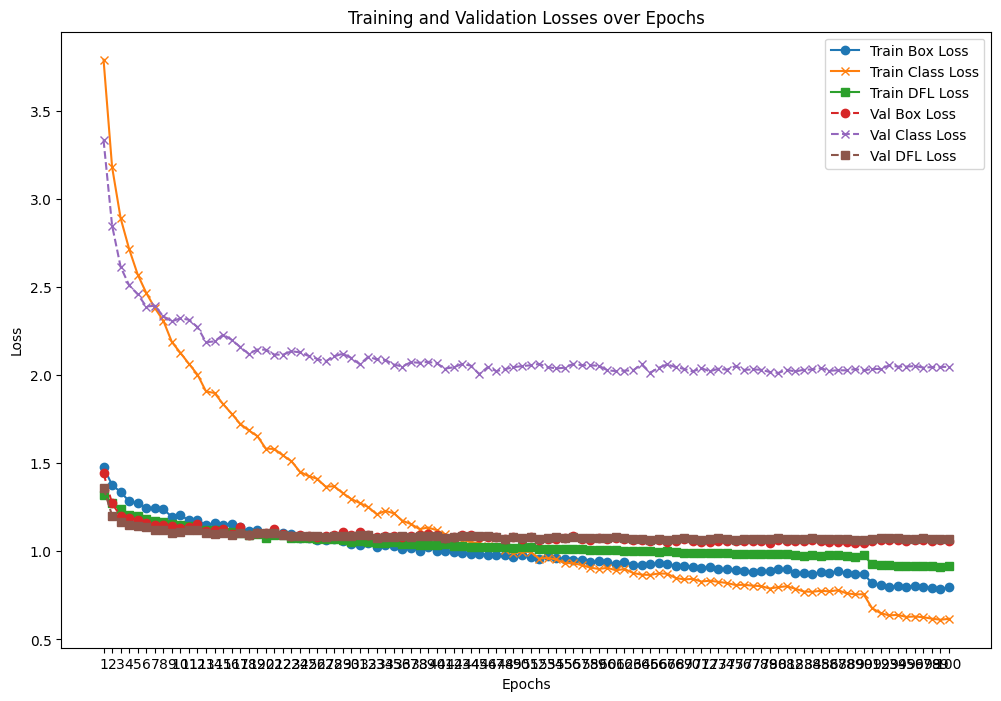

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the log file into a DataFrame
log_file = '/kaggle/working/runs/detect/train/results.csv'
log_data = pd.read_csv(log_file)

# Convert necessary columns to numeric
log_data['epoch'] = pd.to_numeric(log_data['epoch'], errors='coerce').astype(int)  # Convert to integer
log_data['train/box_loss'] = pd.to_numeric(log_data['train/box_loss'], errors='coerce')
log_data['train/cls_loss'] = pd.to_numeric(log_data['train/cls_loss'], errors='coerce')
log_data['train/dfl_loss'] = pd.to_numeric(log_data['train/dfl_loss'], errors='coerce')
log_data['val/box_loss'] = pd.to_numeric(log_data['val/box_loss'], errors='coerce')
log_data['val/cls_loss'] = pd.to_numeric(log_data['val/cls_loss'], errors='coerce')
log_data['val/dfl_loss'] = pd.to_numeric(log_data['val/dfl_loss'], errors='coerce')

# Drop rows with NaN values in relevant columns
log_data = log_data.dropna(subset=['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 
                                   'val/box_loss', 'val/cls_loss', 'val/dfl_loss'])

# Plot the training and validation losses
plt.figure(figsize=(12, 8))

# Plot training losses
plt.plot(log_data['epoch'], log_data['train/box_loss'], label='Train Box Loss', linestyle='-', marker='o')
plt.plot(log_data['epoch'], log_data['train/cls_loss'], label='Train Class Loss', linestyle='-', marker='x')
plt.plot(log_data['epoch'], log_data['train/dfl_loss'], label='Train DFL Loss', linestyle='-', marker='s')

# Plot validation losses
plt.plot(log_data['epoch'], log_data['val/box_loss'], label='Val Box Loss', linestyle='--', marker='o')
plt.plot(log_data['epoch'], log_data['val/cls_loss'], label='Val Class Loss', linestyle='--', marker='x')
plt.plot(log_data['epoch'], log_data['val/dfl_loss'], label='Val DFL Loss', linestyle='--', marker='s')

# Customize the plot
plt.title('Training and Validation Losses over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(log_data['epoch'])  # Ensure that the epoch ticks are shown as integers
plt.legend(loc='upper right')

# Show the plot
plt.show()


# Validation results

In [12]:
results = model.val()  # Evaluate on the validation set
print(f"Validation Results: {results}")


Ultralytics 8.3.121 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv12n summary (fused): 159 layers, 2,560,238 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 75.2±50.6 MB/s, size: 39.8 KB)


val: Scanning /kaggle/input/taco-dataset-yolo-format/valid/labels... 1704 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1704/1704 [00:02<00:00, 803.67it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/taco-dataset-yolo-format/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:14<00:00,  7.42it/s]


                   all       1704       4830      0.656      0.343      0.384      0.296
        Aluminium foil         48         62       0.88        0.5      0.509      0.417
            Bottle cap        347        459       0.72      0.641      0.682      0.539
                Bottle        275        320      0.732      0.392      0.493      0.316
          Broken glass         13        123      0.507     0.0407     0.0571     0.0269
                   Can        187        267      0.652      0.603       0.67      0.537
                Carton        207        263      0.584      0.518       0.52      0.443
             Cigarette        223        565      0.762     0.0779      0.159     0.0819
                   Cup        162        186      0.644      0.543      0.585      0.476
                   Lid         82         93      0.707      0.312      0.381      0.313
          Other litter        148        178      0.668      0.236      0.293       0.24
         Other plasti

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.3ms preprocess, 3.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2
Validation Results: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a3b5258ad70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033

In [15]:
print("Validation Results:")
print("Mean Precision:", results.box.mp)  # Mean Precision
print("Mean Recall:", results.box.mr)  # Mean Recall
print("mAP 50:", results.box.map50)  # Mean Average Precision at IoU 0.5
print("mAP 50-95:", results.box.map)  # Mean Average Precision at IoU 0.5-0.95


Validation Results:
Mean Precision: 0.6555577290756142
Mean Recall: 0.3425172934355917
mAP 50: 0.38395638480512184
mAP 50-95: 0.2962774502113778


# Saving best model

In [ ]:
best_model = YOLO('runs/detect/train/weights/best.pt')

# Validation Metrics plot

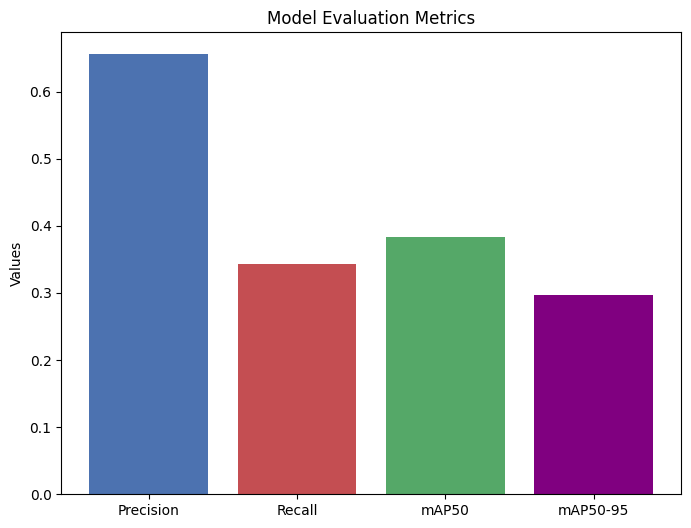

In [16]:
import matplotlib.pyplot as plt

# Scalar values from results_dict
precision = results.results_dict['metrics/precision(B)']
recall = results.results_dict['metrics/recall(B)']
map50 = results.results_dict['metrics/mAP50(B)']
map50_95 = results.results_dict['metrics/mAP50-95(B)']

# Plotting single values (snapshot)
metrics = ['Precision', 'Recall', 'mAP50', 'mAP50-95']
values = [precision, recall, map50, map50_95]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['b', 'r', 'g', 'purple'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Values')
plt.show()


# Testing

In [18]:
best_model = YOLO('runs/detect/train/weights/best.pt')
test_results = best_model.val(data='/kaggle/input/taco-dataset-yolo-format/data.yaml', split='test')


Ultralytics 8.3.121 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv12n summary (fused): 159 layers, 2,560,238 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 10.1±1.6 MB/s, size: 40.7 KB)


val: Scanning /kaggle/input/taco-dataset-yolo-format/test/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 263.18it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/taco-dataset-yolo-format/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]


                   all        100        394      0.825      0.667      0.701      0.563
        Aluminium foil          1          6        0.9          1      0.995      0.851
            Bottle cap         24         26      0.916      0.885      0.963      0.769
                Bottle         12         13      0.712      0.615      0.639      0.379
          Broken glass          1         51      0.193      0.353      0.248      0.105
                   Can          8         19      0.764      0.895      0.907      0.726
                Carton         14         30      0.856      0.667      0.683      0.634
             Cigarette         16         55      0.646      0.182      0.255      0.137
                   Cup         15         19       0.95      0.842      0.965      0.751
                   Lid          3          4       0.71          1      0.945      0.843
          Other litter          7          7      0.796      0.857      0.836       0.74
         Other plasti

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 3.1ms preprocess, 9.8ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val5


In [19]:
# Print test metrics
print(f"Test Precision: {test_results.box.mp:.4f}")
print(f"Test Recall: {test_results.box.mr:.4f}")
print(f"Test mAP@50: {test_results.box.map50:.4f}")
print(f"Test mAP@50-95: {test_results.box.map:.4f}")

Test Precision: 0.8245
Test Recall: 0.6667
Test mAP@50: 0.7015
Test mAP@50-95: 0.5627


In [ ]:
import os
import glob
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Function to parse ground truth annotations in YOLO format
def parse_annotation(annotation_path):
    """
    Parses a YOLO-style annotation file and extracts the class IDs and bounding box information.
    """
    if not os.path.exists(annotation_path):
        print(f"Annotation file {annotation_path} not found.")
        return [], []  # Return empty lists if annotation file is missing
    
    with open(annotation_path, 'r') as file:
        lines = file.readlines()
    
    labels = []
    boxes = []
    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])  # Class ID
        # YOLO format: class_id, x_center, y_center, width, height
        box = [float(x) for x in parts[1:]]  # Bounding box: [x_center, y_center, width, height]
        labels.append(class_id)
        boxes.append(box)
    return labels, boxes

# Load the YOLO model
model = YOLO('runs/detect/train/weights/best.pt')

# Path to the test images and corresponding labels (annotations)
test_image_dir = '/kaggle/input/taco-dataset-yolo-format/test/images/'
test_label_dir = '/kaggle/input/taco-dataset-yolo-format/test/labels/'

# Get the list of test images
test_images = glob.glob(os.path.join(test_image_dir, '*.jpg'))  # Adjust for correct extension if needed

# Output directory to save inference results
output_dir = "/kaggle/working/inference_results/"
os.makedirs(output_dir, exist_ok=True)

# Class names 
class_names = ['Aluminium foil', 'Bottle cap', 'Bottle', 'Broken glass', 'Can', 
               'Carton', 'Cigarette', 'Cup', 'Lid', 'Other litter', 'Other plastic', 
               'Paper', 'Plastic bag - wrapper', 'Plastic container', 'Pop tab', 
               'Straw', 'Styrofoam piece', 'Unlabeled litter']

# Loop through each image and perform inference
for img_path in test_images:
    # Get the corresponding annotation file (in YOLO format)
    annotation_path = os.path.join(test_label_dir, os.path.basename(img_path).replace(".jpg", ".txt").replace(".JPG", ".txt"))
    
    # Perform inference without verbose output
    results = model(img_path, verbose=False)  # Run YOLOv8 on the image
    
    # Get actual labels (ground truth) from annotation file
    actual_labels, actual_boxes = parse_annotation(annotation_path)
    actual_labels_names = [class_names[label] for label in actual_labels]
    
    # Save the result image with predictions
    img_name = os.path.basename(img_path)
    result_img_path = os.path.join(output_dir, img_name)
    results[0].save(result_img_path)
    
    # Extract predicted labels and bounding boxes
    if results[0].boxes is None or len(results[0].boxes.cls) == 0:
        predicted_labels = ["No prediction"]
        predicted_boxes = []
    else:
        predicted_labels = [results[0].names[int(cls)] for cls in results[0].boxes.cls]
        predicted_boxes = results[0].boxes.xywh.cpu().numpy()  # Ensure numpy format for further processing
    
    # Open the original image for proper ground truth visualization
    img_predicted = Image.open(result_img_path)
    img_actual = Image.open(img_path)  # Reload the original image for ground truth
    
    # Create drawing objects
    draw_predicted = ImageDraw.Draw(img_predicted)
    draw_actual = ImageDraw.Draw(img_actual)
    
    # Draw predicted bounding boxes (blue) on the predicted image
    img_width, img_height = img_predicted.size
    if len(predicted_boxes) == 0:  # Check if predicted_boxes is empty
        draw_predicted.text((10, 10), "No prediction", fill="red")
    else:
        for i, box in enumerate(predicted_boxes):
            x_center, y_center, width, height = box
            x1 = int((x_center - width / 2) * img_width)
            y1 = int((y_center - height / 2) * img_height)
            x2 = int((x_center + width / 2) * img_width)
            y2 = int((y_center + height / 2) * img_height)
            draw_predicted.rectangle([x1, y1, x2, y2], outline="blue", width=2)
            draw_predicted.text((x1, y1), predicted_labels[i] if i < len(predicted_labels) else "Unknown", fill="blue")
    
    # Draw ground truth bounding boxes (green) on the actual image
    for i, box in enumerate(actual_boxes):
        x_center, y_center, width, height = box
        x1 = int((x_center - width / 2) * img_width)
        y1 = int((y_center - height / 2) * img_height)
        x2 = int((x_center + width / 2) * img_width)
        y2 = int((y_center + height / 2) * img_height)
        draw_actual.rectangle([x1, y1, x2, y2], outline="green", width=2)
        draw_actual.text((x1, y1), actual_labels_names[i], fill="white")
    
    # Display images side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    
    axes[0].imshow(img_predicted)
    axes[0].set_title("\n".join(predicted_labels), fontsize=14, wrap=True)
    axes[0].axis("off")
    
    axes[1].imshow(img_actual)
    axes[1].set_title("\n".join(actual_labels_names), fontsize=14, wrap=True)
    axes[1].axis("off")
    
    plt.show()


In [21]:
import shutil

# 압축할 경로와 파일 이름 지정
shutil.make_archive('/kaggle/working/train_backup', 'zip', '/kaggle/working/runs/detect/train')


'/kaggle/working/train_backup.zip'